In [1]:
#import necessary libraries and Modules
import ImageManipFuncs as IMF
import PlottingFuncs as PF
import ImageAnalysis as IA
import myGUI 

import importlib
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os
import ipywidgets as widgets
from IPython.display import display
import math
from PIL import Image, ImageDraw, ImageTk, ImageOps
import tkinter as tk
from tkinter import ttk
from astropy.io import fits



In [3]:
importlib.reload(IMF)
importlib.reload(PF)
importlib.reload(IA)

<module 'ImageAnalysis' from 'c:\\Users\\HP\\Documents\\JHU_Academics\\Research\\PHANGS\\PHANGSDustFill\\ImageAnalysis.py'>

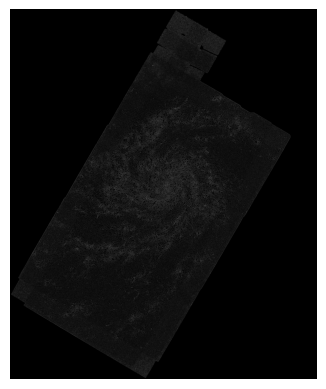

In [3]:
# Specify the path to your FITS file
fits_file = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\JWST_F770W_filamentenhanced_multiscale_examples (1)\Users\dthilker\python\Constrained-Diffusion-Decomposition-main\ngc4254_770_CDDss0016pc_arcsinh0p1_sato.fits'

# Load the FITS file data
hdul = fits.open(fits_file)
image_data = hdul[0].data  # Assuming the image data is in the primary HDU

# Display the image using Matplotlib without axes and colorbar
plt.imshow(image_data, cmap='gray')  # Adjust cmap if your data is not grayscale
plt.axis('off')  # Turn off axes

# Save the image as PNG without any additional elements
save_path = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS'
os.makedirs(save_path, exist_ok=True)
save_file = os.path.join(save_path, 'ThresholdedImage.png')
plt.savefig(save_file, bbox_inches='tight', pad_inches=0)

# Close the FITS file
hdul.close()

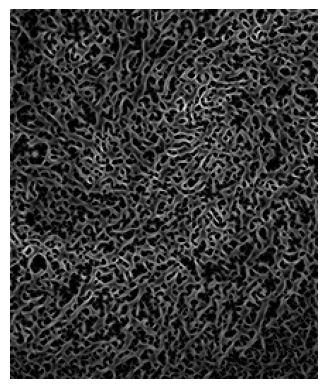

In [10]:
# Load the FITS file data
hdul = fits.open(fits_file)
image_data = hdul[0].data  # Assuming the image data is in the primary HDU

# Apply thresholding
threshold_value = 0.1  # Adjust threshold value as needed
thresholded_data = np.where(image_data <= threshold_value, 1.0, 0.0)

# Define the zoomed-in region
zoom_factor = 0.01  # Zoom factor (adjust as needed)
image_center_x, image_center_y = image_data.shape[1] // 2, image_data.shape[0] // 2  # Center of the image
zoom_width = int(image_data.shape[1] * zoom_factor)
zoom_height = int(image_data.shape[0] * zoom_factor)
x_start = image_center_x - zoom_width // 2
x_end = image_center_x + zoom_width // 2
y_start = image_center_y - zoom_height // 2
y_end = image_center_y + zoom_height // 2

# Display the zoomed-in thresholded image using Matplotlib without axes and colorbar
plt.imshow(thresholded_data[y_start:y_end, x_start:x_end], cmap='gray', vmin=0, vmax=1)  # Adjust cmap if your data is not grayscale
plt.axis('off')  # Turn off axes

# Save the zoomed-in thresholded image as PNG without any additional elements
save_path = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS'
os.makedirs(save_path, exist_ok=True)
save_file = os.path.join(save_path, 'ThresholdedZoomedImage.png')
plt.savefig(save_file, bbox_inches='tight', pad_inches=0)

# Close the FITS file
hdul.close()

Thresholded image saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1Invert.png
(1038, 1042)


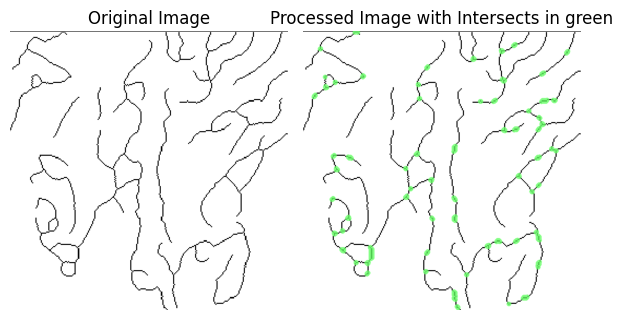

Processed C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1Invert.png successfully. Saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1NoIntersects.png
(1038, 1042)


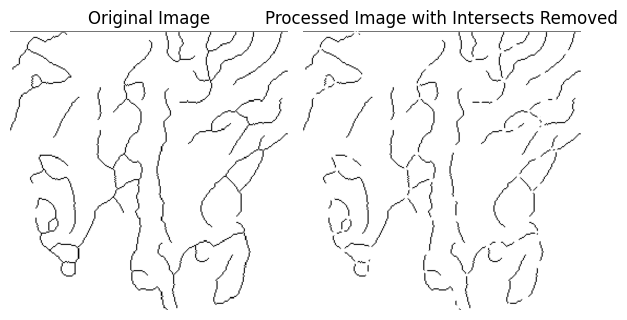

Processed C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1Invert.png successfully. Saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1NoIntersects.png


In [4]:
input_image = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1.png'
invert_input = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1Invert.png'
intersects_removed = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\ThinSkeleton1NoIntersects.png'
 
IMF.invert_image(input_image, invert_input)
IA.identify_intersects(invert_input, intersects_removed,dot_size=8,box_size=121, perc = .4, RGBA_color = (100, 255, 100, 200), title = 'Processed Image with Intersects in green')
IA.identify_intersects(invert_input, intersects_removed,dot_size=4,box_size=121, perc = .4, RGBA_color = (255, 255, 255, 255), title = 'Processed Image with Intersects Removed')

Thresholded image saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\InvertIntersects.png


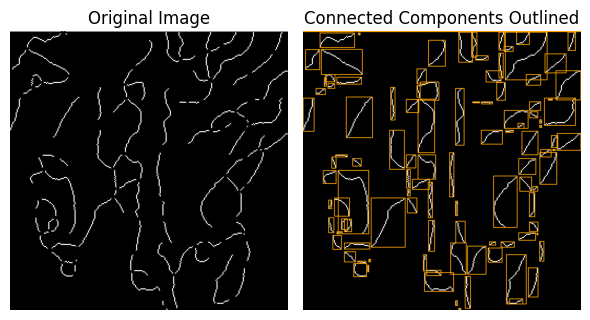

In [5]:
invert_intersects_removed = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\InvertIntersects.png'
IMF.invert_image(intersects_removed ,invert_intersects_removed)
labels, stats, num_labels = IA.identify_connected_components(invert_intersects_removed)

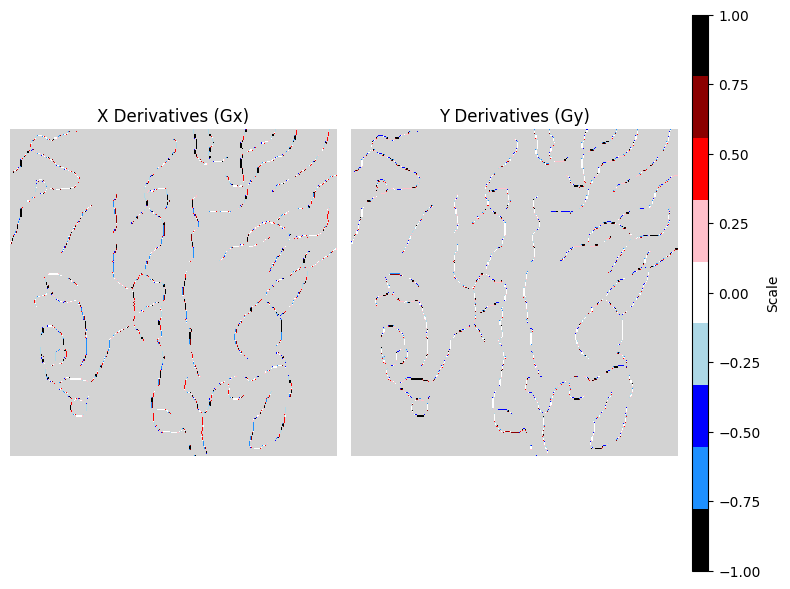

In [58]:
# read the image
importlib.reload(IA)
importlib.reload(PF)
# img = cv2.imread(intersects_removed)

# # convert to gray
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # blur
# blur = cv2.GaussianBlur(gray, (0,0), 1.3, 1.3)
# # apply sobel derivatives
# sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=3)
# sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=3)
# PF.plot_sobel_derivatives(sobelx, sobely)
mask_path = intersects_removed

sobel_x, sobel_y = IA.apply_sobel_filter_to_components(invert_intersects_removed, labels, stats, num_labels)
PF.plot_sobel_derivatives(mask_path,sobel_x, sobel_y)



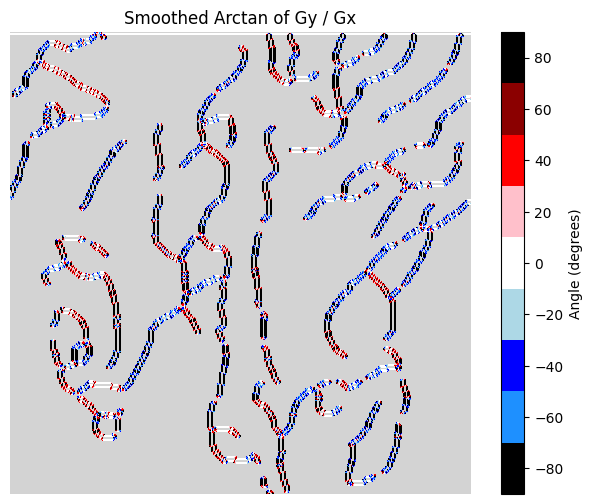

Smoothed angle map saved as C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\smoothed_angles.png


In [60]:
importlib.reload(PF)
smoothed_angles = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\smoothed_angles.png'
mask_path = invert_intersects_removed
smoothed_angle_map, copy_angled_map = PF.plot_arctan_with_smoothing(sobel_y, sobel_x,mask_path, 1, smoothed_angles)

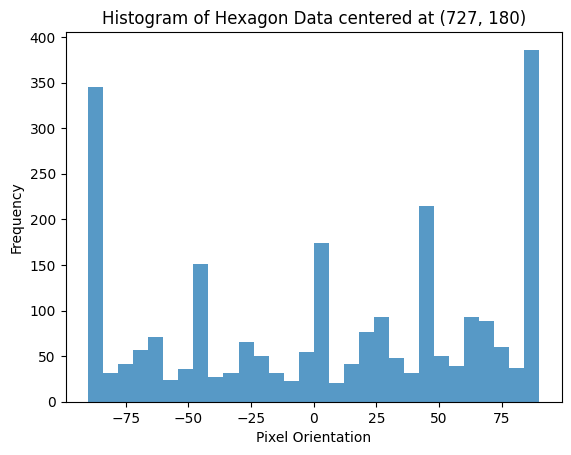

Number of Pixels 2493


In [45]:
importlib.reload(myGUI)
original_image_path = r'C:\Users\HP\Documents\JHU_Academics\Research\PHANGS\smoothed_angles.png'  
hexagon_size = 60
data_array = smoothed_angle_map  # Ensure this variable is passed correctly

original_image = Image.open(original_image_path).convert("RGBA")

hexagons, im_display = myGUI.update_image(hexagon_size, original_image)

param = {
    'hexagon_size': hexagon_size,
    'original_image': original_image,
    'hexagons': hexagons,
    'im_display': im_display,
    'im_display_base': im_display.copy(),
    'data_array': data_array,
    'hex_data': [],
    'hex_center': None  # Store the center of the hexagon
}

# Create window and set mouse callback
cv2.namedWindow('image')
cv2.setMouseCallback('image', myGUI.click_event, param)

# Create Tkinter window for buttons
root = tk.Tk()
root.title("Hexagon Size Adjuster")

increase_button = ttk.Button(root, text="+", command=lambda: myGUI.increase_hexagon_size(param))
increase_button.pack(side=tk.LEFT)

decrease_button = ttk.Button(root, text="-", command=lambda: myGUI.decrease_hexagon_size(param))
decrease_button.pack(side=tk.LEFT)

analyze_button = ttk.Button(root, text="Analyze Hexagon", command=lambda: myGUI.analyze_hexagon(param['hex_data'], param['hex_center']))
analyze_button.pack(side=tk.LEFT)

def on_closing():
    cv2.destroyAllWindows()
    root.destroy()

root.protocol("WM_DELETE_WINDOW", on_closing)
root.mainloop()
